In [1]:
import numpy as np

from utils.data_utils import load_data, split_data
from utils.visualizer import *
from machines.random_forest import evaluate_random_forest
    
system_types = ['B','OSC', 'SSS']
 
V = 10**8; # 10**4 10**5 np.inf
max_samples = 50
data, labels, beta_epsilon_pairs = load_data(system_types, V, max_samples)
train_data, test_data, train_labels, test_labels, train_pairs , test_pairs = split_data(data, labels, beta_epsilon_pairs, option="option2", balanced=True)

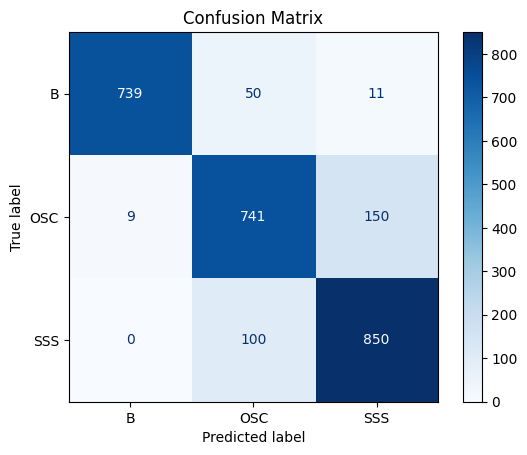

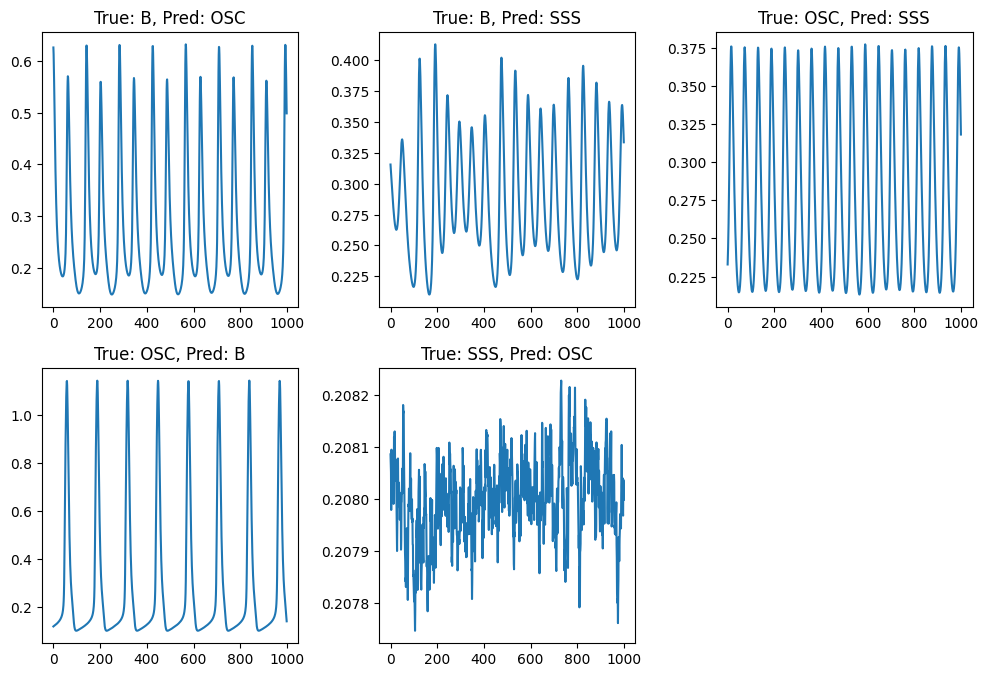

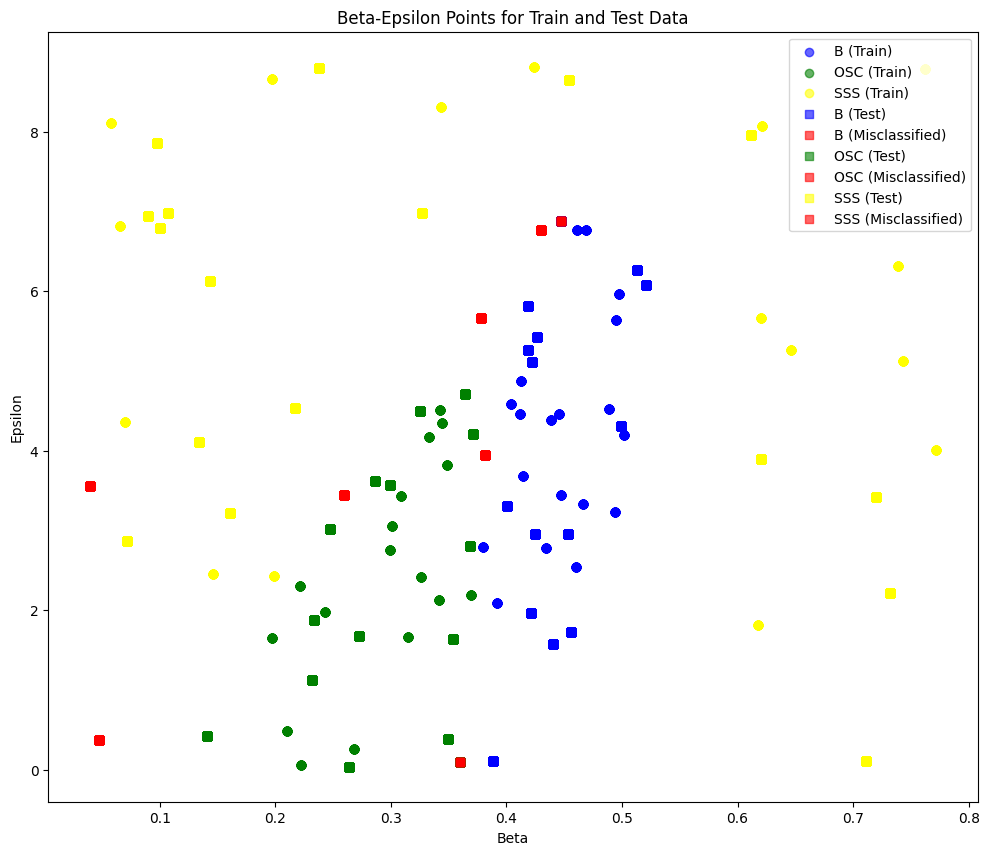

In [2]:
random_state = 100
cm, clf, predictions = evaluate_random_forest(train_data, train_labels, test_data, test_labels, random_state)
plot_confusion_matrix(cm, 'Confusion Matrix', labels=np.unique(train_labels))
visualize_misclassified(test_data, test_labels, predictions)
visualize_beta_epsilon_points(train_labels, test_labels, train_pairs , test_pairs, predictions)
overlap = np.intersect1d(train_pairs, test_pairs)

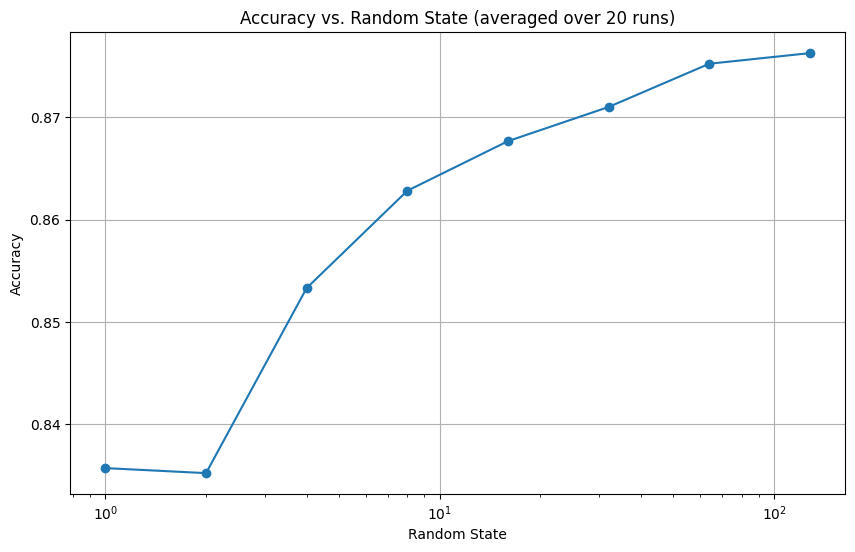

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the existence of the evaluate_random_forest function and other dependencies
random_states = [2**i for i in range(8)]  # random states 1, 2, 4, ..., 1024
accuracies = []

for random_state in random_states:
    random_state_accuracies = []
    for _ in range(20):  # Repeat the experiment N times for each random_state
        cm, clf, predictions = evaluate_random_forest(train_data, train_labels, test_data, test_labels, random_state)
        accuracy = np.mean(predictions == test_labels)  # Calculate accuracy
        random_state_accuracies.append(accuracy)
    accuracies.append(np.mean(random_state_accuracies))  # Store the mean accuracy for this random_state

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(random_states, accuracies, marker='o')
plt.xscale('log')  # Logarithmic scale for x-axis since random states double each time
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Random State (averaged over 20 runs)')
plt.grid(True)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the existence of the evaluate_random_forest function and other dependencies
random_states = list(range(1, 21))  # random states 1, 2, ..., 20
accuracies = []

for random_state in random_states:
    random_state_accuracies = []
    for _ in range(20):  # Repeat the experiment N times for each random_state
        cm, clf, predictions = evaluate_random_forest(train_data, train_labels, test_data, test_labels, random_state)
        accuracy = np.mean(predictions == test_labels)  # Calculate accuracy
        random_state_accuracies.append(accuracy)
    accuracies.append(np.mean(random_state_accuracies))  # Store the mean accuracy for this random_state

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(random_states, accuracies, marker='o')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Random State (averaged over 20 runs)')
plt.grid(True)
plt.show()
